<a href="https://colab.research.google.com/github/maakhhh/spoitify/blob/main/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
data = pd.read_csv('dataset.csv')
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
track_id,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


Удаляем одинаковые треки, из дубликатов оставляем самые популярные

In [ ]:
max_popularity = data.groupby(['track_name', 'artists'])['popularity'].idxmax()
data = data.loc[max_popularity].reset_index(drop=True)
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,36750,0fROT4kK5oTm8xO8PX6EJF,Rilès,!I'll Be Back!,!I'll Be Back!,52,178533,True,0.823,0.6120,...,-7.767,1,0.2480,0.168,0.000000,0.1090,0.6880,142.959,4,french
1,92751,1hH0t381PIXmUVWyG1Vj3p,Brian Hyland,The Bashful Blond,"""A"" You're Adorable",39,151680,False,0.615,0.3750,...,-10.362,0,0.0319,0.482,0.000000,0.1110,0.9220,110.720,4,rockabilly
2,66970,1B45DvGMoFWdbAEUH2qliG,Little Apple Band,The Favorite Songs Of Sesame Street,"""C"" IS FOR COOKIE",32,84305,False,0.553,0.8120,...,-5.542,1,0.0558,0.132,0.000010,0.0794,0.8710,118.368,4,kids
3,66996,73lXf5if6MWVWnsgXhK8bd,Little Apple Band,Sesame Street and Friends,"""C"" is for Cookie",8,86675,False,0.664,0.6110,...,-8.687,1,0.0886,0.120,0.000000,0.0408,0.7580,118.443,4,kids
4,101161,0jmz4aHEIBCRgrcV2xEkwB,Traditional;Sistine Chapel Choir;Massimo Palom...,Classical Christmas,"""Christe, Redemptor omnium""",0,289133,False,0.111,0.0568,...,-28.053,1,0.0551,0.990,0.697000,0.1100,0.0395,169.401,1,sleep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81338,65756,2oVHb8wyg6oC2iNpGBNvx1,HEIZE,Hotel del Luna (Original Television Soundtrack...,내 맘을 볼 수 있나요,63,225785,False,0.397,0.1660,...,-10.678,1,0.0349,0.884,0.000000,0.1000,0.1310,134.708,4,k-pop
81339,65859,4kIpBfvK44bxqX7zo8K1oP,Gaho,ITAEWON CLASS (Original Television Soundtrack)...,시작,65,202440,False,0.591,0.8180,...,-3.532,1,0.0730,0.172,0.000000,0.1260,0.5740,108.107,4,k-pop
81340,75903,4mHc7LUlO3k6AXeFV2EiJK,Yiruma,Yiruma Official Album 'Piano Therapy' (The Ori...,약속 (Piano Solo),37,144533,False,0.504,0.1430,...,-18.713,1,0.0701,0.980,0.922000,0.1240,0.0584,148.786,4,new-age
81341,79554,0tQesiSZJQOdHeAC7r59us,GODA,One Punch Man (Original Soundtrack),원펀맨 Theme - Sad Theme,37,228000,False,0.542,0.3370,...,-16.088,1,0.0539,0.985,0.933000,0.1470,0.4430,159.951,4,piano


Удаляем предикторы, которые никак не могут повлиять на популярность трека: названия, авторы и тд

In [ ]:
data = data.drop('track_id', axis=1)
data = data.drop('artists', axis=1)
data = data.drop('album_name', axis=1)
data = data.drop('track_name', axis=1)
data = data.drop('Unnamed: 0', axis=1)

Переводим все параметры в числа

In [ ]:
unique_genre = data['track_genre'].unique()
genre_map = {}
for i in range(len(unique_genre)):
  genre_map[unique_genre[i]] = i
data['track_genre'] = data['track_genre'].map(genre_map)
data['explicit'] = data['explicit'].astype(int)
data

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,52,178533,1,0.823,0.6120,1,-7.767,1,0.2480,0.168,0.000000,0.1090,0.6880,142.959,4,0
1,39,151680,0,0.615,0.3750,0,-10.362,0,0.0319,0.482,0.000000,0.1110,0.9220,110.720,4,1
2,32,84305,0,0.553,0.8120,3,-5.542,1,0.0558,0.132,0.000010,0.0794,0.8710,118.368,4,2
3,8,86675,0,0.664,0.6110,3,-8.687,1,0.0886,0.120,0.000000,0.0408,0.7580,118.443,4,2
4,0,289133,0,0.111,0.0568,10,-28.053,1,0.0551,0.990,0.697000,0.1100,0.0395,169.401,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81338,63,225785,0,0.397,0.1660,9,-10.678,1,0.0349,0.884,0.000000,0.1000,0.1310,134.708,4,63
81339,65,202440,0,0.591,0.8180,4,-3.532,1,0.0730,0.172,0.000000,0.1260,0.5740,108.107,4,63
81340,37,144533,0,0.504,0.1430,1,-18.713,1,0.0701,0.980,0.922000,0.1240,0.0584,148.786,4,40
81341,37,228000,0,0.542,0.3370,2,-16.088,1,0.0539,0.985,0.933000,0.1470,0.4430,159.951,4,7


Чтобы не использовать большие числа, переводим длительность треков в милисекунды

In [ ]:
data['duration_s'] = (data['duration_ms'] / 1000).round()
data = data.drop(columns=['duration_ms'])
data

,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_s
0,52,1,0.823,0.6120,1,-7.767,1,0.2480,0.168,0.000000,0.1090,0.6880,142.959,4,0,179.0
1,39,0,0.615,0.3750,0,-10.362,0,0.0319,0.482,0.000000,0.1110,0.9220,110.720,4,1,152.0
2,32,0,0.553,0.8120,3,-5.542,1,0.0558,0.132,0.000010,0.0794,0.8710,118.368,4,2,84.0
3,8,0,0.664,0.6110,3,-8.687,1,0.0886,0.120,0.000000,0.0408,0.7580,118.443,4,2,87.0
4,0,0,0.111,0.0568,10,-28.053,1,0.0551,0.990,0.697000,0.1100,0.0395,169.401,1,3,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81338,63,0,0.397,0.1660,9,-10.678,1,0.0349,0.884,0.000000,0.1000,0.1310,134.708,4,63,226.0
81339,65,0,0.591,0.8180,4,-3.532,1,0.0730,0.172,0.000000,0.1260,0.5740,108.107,4,63,202.0
81340,37,0,0.504,0.1430,1,-18.713,1,0.0701,0.980,0.922000,0.1240,0.0584,148.786,4,40,145.0
81341,37,0,0.542,0.3370,2,-16.088,1,0.0539,0.985,0.933000,0.1470,0.4430,159.951,4,7,228.0


In [ ]:
data['time_signature'].unique()

array([4, 1, 0, 3, 5])

В описании датасета заявлено, что данный предиктор варьируется от 3 до 7, однако по факту мы видим другие значения, это может повлиять на результат работы, поэтому лучше удалить данный предиктор

In [ ]:
data = data.drop('time_signature', axis=1)

Далее построим хитмап корреляции между предикторами

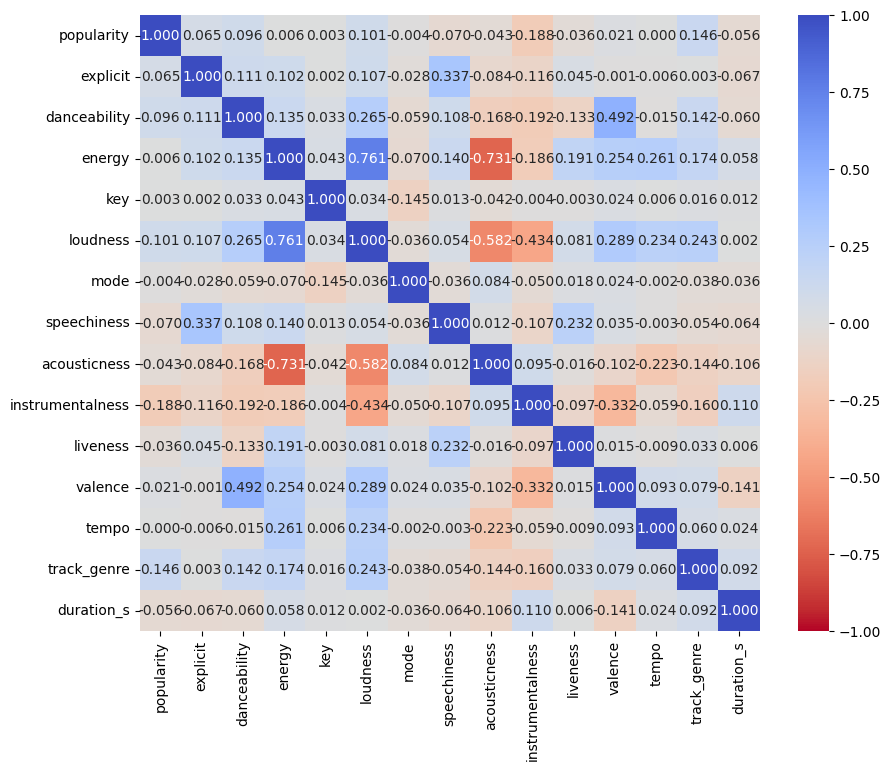

In [ ]:
corr = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".3f",
    cmap="coolwarm_r",
    vmin=-1,
    vmax=1
)
plt.show()

По графику видно, что популярность имеет самую большую корреляцию с жанром трека, очень высокая корреляция loudness и energy, danceability и valence, так что параметры loudness и valence можно удалить

In [ ]:
data = data.drop('loudness', axis=1)
data = data.drop('danceability', axis=1)

Посмотрим на распределение популярности (target) треков

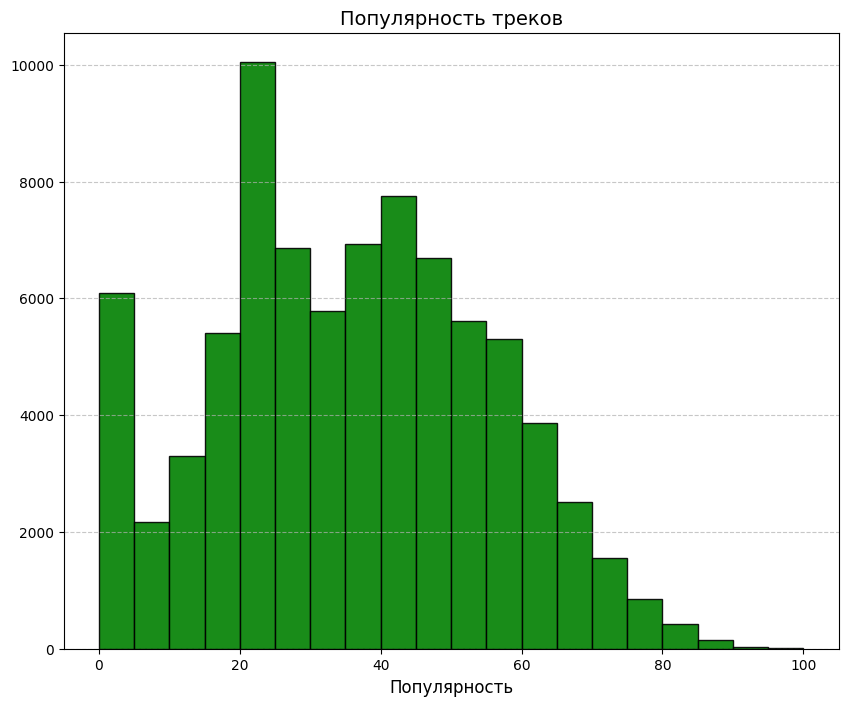

In [ ]:
plt.figure(figsize=(10, 8))
plt.hist(data['popularity'], bins=20, color='green', edgecolor='black', alpha=0.9)
plt.title('Популярность треков', fontsize=14)
plt.xlabel('Популярность', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

В целом график достаточно логичен, однако виден выброс на знчениях 0-5, неоправданно много треков, предполагаю, что много треков имеют популярность ноль, из-за неопределенности популярности

До этого мы выяснили, что популярность трека имеет самую высокую корреляцию с жанром треком, посмотрим график средней популярности треков по жанрам

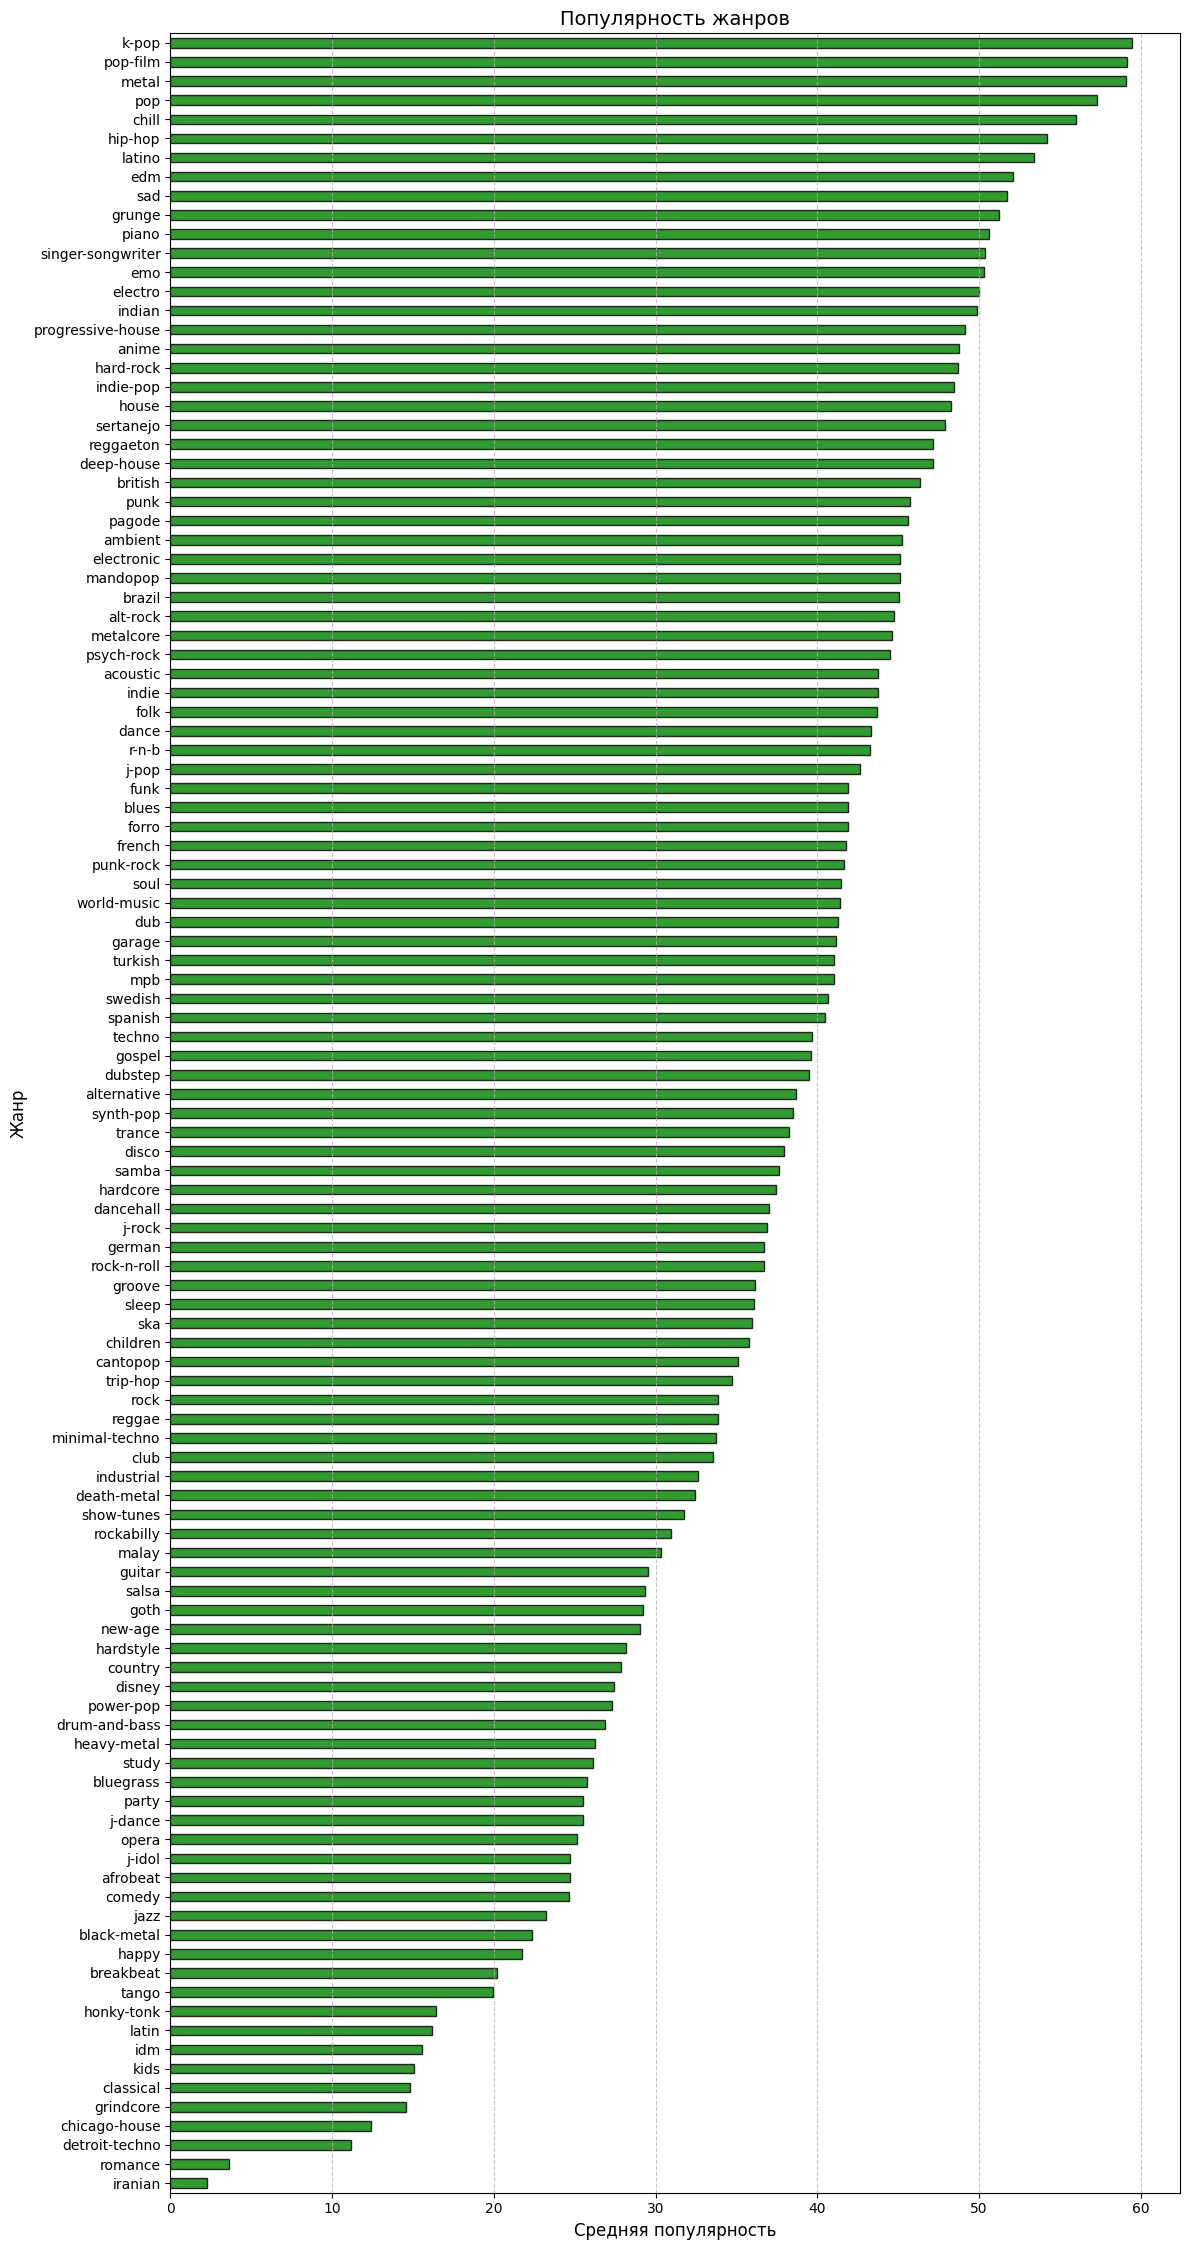

In [ ]:
genres_name = {value: key for key, value in genre_map.items()}
mean_popularity = data.groupby('track_genre')['popularity'].mean().sort_values()
mean_popularity.index = mean_popularity.index.map(genres_name)

plt.figure(figsize=(12, len(mean_popularity) * 0.2))
mean_popularity.plot(kind='barh', color='green', edgecolor='black', alpha=0.8)
plt.title('Популярность жанров', fontsize=14)
plt.xlabel('Средняя популярность', fontsize=12)
plt.ylabel('Жанр', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Самые популярные жанры - к-поп (забавно), поп-фильм (ожидаемо) и метал (удивительно)

Добавим фичу, которая будет отображать веселость трека, для этого умножим valence и energy

In [ ]:
data["funny"] = data['valence'] * data['energy']
data['funny'].corr(data['popularity'])

0.02419716078852921

Далее построим модель RandomForest, чтобы оценить feature importans

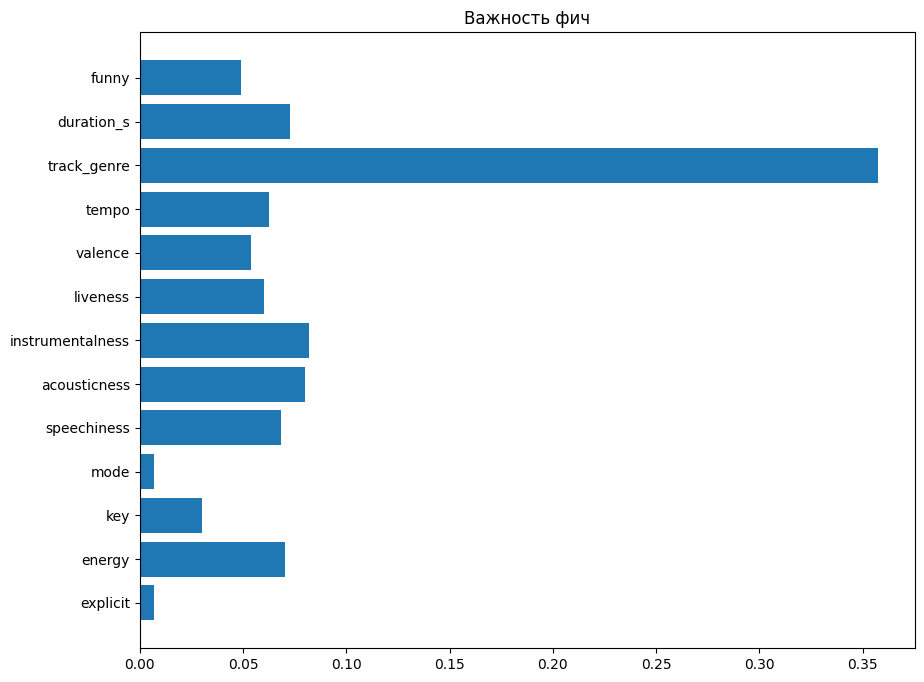

In [ ]:
X = data.drop(columns=['popularity'])
y = data['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_

plt.figure(figsize=(10, 8))
plt.barh(X.columns, importances)
plt.title('Важность фич')
plt.show()

В целом видим, что новая фича неплохо влияет на результат, также видим, что track_genre имеет очень высокое значение

Далее построим четыре модели и сравним их: линейная регрессия, рандом форест, XGBoost и TF/Keras

In [ ]:
X = data.drop(columns=['popularity'])
y = data['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

# Линейная регрессия
lr = LinearRegression()
lr_score = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

# Рандом форест
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf_score = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

# 3. XGBoost
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb_score = cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

# 4. TensorFlow
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

def evaluate_model(model, X_train, y_train):
    kfold = 5
    mse_scores = []
    for fold in range(kfold):
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
        predictions = model.predict(X_train)
        mse = mean_squared_error(y_train, predictions)
        mse_scores.append(mse)
    return np.mean(mse_scores)

nn_score = evaluate_model(model, X_train, y_train)

print(f"Linear Regression MSE: {-lr_score:.2f}")
print(f"Random Forest MSE: {-rf_score:.2f}")
print(f"XGBoost MSE: {-xgb_score:.2f}")
print(f"Neural Network (TensorFlow) MSE: {nn_score:.2f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
